In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
df = pd.read_csv('lending_club_2020_train.csv')

/var/folders/7t/th_8p1tn145cc9ndrc3l79k40000gn/T/ipykernel_83869/1322940607.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('lending_club_2020_train.csv')


In [86]:
df['loan_status'].value_counts()

loan_status
Fully Paid                                             898522
Current                                                618688
Charged Off                                            217366
Late (31-120 days)                                       9840
In Grace Period                                          6049
Late (16-30 days)                                        1620
Issued                                                   1258
Does not meet the credit policy. Status:Fully Paid       1223
Does not meet the credit policy. Status:Charged Off       460
Default                                                   268
Name: count, dtype: int64

In [87]:
df['application_type'].value_counts()

application_type
Individual    1628937
Joint App      126357
Name: count, dtype: int64

In [89]:
df_co = df.query('application_type == "Joint App"')

In [90]:
df_co['annual_inc_joint'].describe()

count    1.263570e+05
mean     1.304439e+05
std      8.734330e+04
min      9.000000e+03
25%      8.600000e+04
50%      1.150000e+05
75%      1.550000e+05
max      9.706945e+06
Name: annual_inc_joint, dtype: float64

In [91]:
df_co['annual_inc_joint'].value_counts(normalize = True).index

Index([100000.0, 110000.0, 120000.0, 130000.0,  90000.0, 140000.0, 150000.0,
        80000.0, 105000.0, 115000.0,
       ...
       127607.0,  55450.0,  65664.0, 163244.0, 144268.0,  58270.0,  87657.0,
       127480.0, 328756.0, 141348.0],
      dtype='float64', name='annual_inc_joint', length=17981)

In [92]:
df_co['loan_status'].value_counts()

loan_status
Current               81986
Fully Paid            31218
Charged Off           10426
Late (31-120 days)     1296
In Grace Period        1078
Late (16-30 days)       205
Issued                  126
Default                  22
Name: count, dtype: int64

In [93]:
df_co = df_co.query('(loan_status == "Fully Paid") | (loan_status == "Charged Off") | (loan_status == "Default")')


In [94]:
df_co['loan_status'].value_counts()

loan_status
Fully Paid     31218
Charged Off    10426
Default           22
Name: count, dtype: int64

In [95]:
df_co['loan_status'].value_counts(normalize = True)

loan_status
Fully Paid     0.749244
Charged Off    0.250228
Default        0.000528
Name: proportion, dtype: float64

In [96]:
df_co['Default_status'] = np.where(df_co['loan_status'] == "Fully Paid", 0, 1)


In [97]:
df_co['Default_status'].value_counts()

Default_status
0    31218
1    10448
Name: count, dtype: int64

In [98]:
df_co = df_co.query('Default_status in [0, 1]')

In [99]:
df_co['Default_status'].value_counts()

Default_status
0    31218
1    10448
Name: count, dtype: int64

In [100]:
df_co['annual_inc_joint'].describe()

count    4.166600e+04
mean     1.225602e+05
std      7.621570e+04
min      9.000000e+03
25%      8.227625e+04
50%      1.100000e+05
75%      1.460000e+05
max      7.874821e+06
Name: annual_inc_joint, dtype: float64

In [101]:
df_co['annual_inc_joint'].value_counts()

annual_inc_joint
110000.0    741
100000.0    730
120000.0    683
90000.0     650
130000.0    607
           ... 
247500.0      1
56153.0       1
83582.0       1
174200.0      1
125184.0      1
Name: count, Length: 7475, dtype: int64

In [102]:
df_co['annual_inc_joint'].sort_values()

517045        9000.0
1070339      13470.0
703187       15400.0
1515388      15850.0
36816        17200.0
             ...    
1176576    1500000.0
615817     1837000.0
1120223    2000000.0
1557523    2000000.0
685883     7874821.0
Name: annual_inc_joint, Length: 41666, dtype: float64

(array([0.000e+00, 1.000e+00, 1.000e+00, 1.300e+01, 3.900e+01, 1.080e+02,
        1.790e+02, 2.990e+02, 4.240e+02, 5.980e+02, 7.100e+02, 9.430e+02,
        1.234e+03, 1.282e+03, 1.663e+03, 1.673e+03, 1.932e+03, 1.845e+03,
        2.076e+03, 1.818e+03, 2.023e+03, 1.797e+03, 1.885e+03, 1.535e+03,
        1.624e+03, 1.382e+03, 1.439e+03, 1.145e+03, 1.209e+03, 9.010e+02,
        1.068e+03, 7.630e+02, 8.360e+02, 6.310e+02, 6.520e+02, 5.270e+02,
        5.520e+02, 3.870e+02, 4.110e+02, 3.120e+02, 4.450e+02, 2.580e+02,
        2.860e+02, 2.400e+02, 2.310e+02, 1.610e+02, 1.640e+02, 1.200e+02,
        1.780e+02, 1.020e+02, 1.530e+02, 8.400e+01, 1.060e+02, 7.300e+01,
        9.600e+01, 5.800e+01, 7.300e+01, 5.500e+01, 7.000e+01, 3.700e+01,
        8.200e+01, 4.400e+01, 3.500e+01, 2.500e+01, 3.900e+01, 2.900e+01,
        3.300e+01, 1.900e+01, 2.800e+01, 1.400e+01, 2.500e+01, 1.000e+01,
        2.800e+01, 1.400e+01, 1.700e+01, 1.500e+01, 1.300e+01, 1.200e+01,
        7.000e+00, 8.000e+00, 3.600e+0

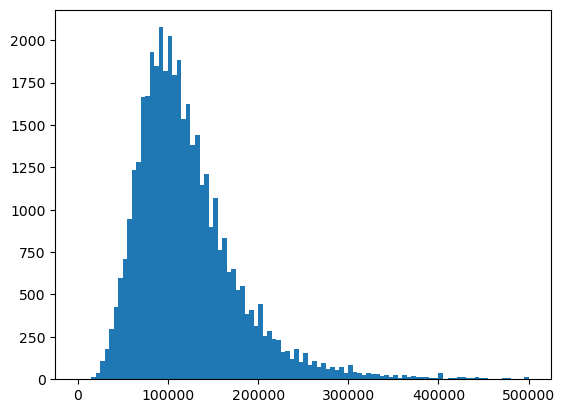

In [106]:
plt.hist(df_co['annual_inc_joint'], bins = 100, range = [0, 500000])

In [107]:
df_co['dti_joint'].describe()

count    41665.000000
mean        18.989939
std          7.859304
min          0.000000
25%         13.240000
50%         18.570000
75%         24.390000
max         69.490000
Name: dti_joint, dtype: float64

In [108]:
df_co['dti_joint'].value_counts()

dti_joint
18.54    37
20.45    36
15.47    36
20.16    32
20.38    32
         ..
37.80     1
3.40      1
35.96     1
38.98     1
38.27     1
Name: count, Length: 3864, dtype: int64

(array([5.500e+01, 7.700e+01, 8.600e+01, 1.380e+02, 1.830e+02, 2.090e+02,
        2.800e+02, 3.520e+02, 4.250e+02, 5.220e+02, 5.750e+02, 6.400e+02,
        7.740e+02, 8.110e+02, 9.240e+02, 9.890e+02, 1.090e+03, 1.178e+03,
        1.218e+03, 1.227e+03, 1.311e+03, 1.389e+03, 1.361e+03, 1.430e+03,
        1.403e+03, 1.443e+03, 1.370e+03, 1.381e+03, 1.365e+03, 1.340e+03,
        1.225e+03, 1.237e+03, 1.196e+03, 1.117e+03, 1.103e+03, 1.075e+03,
        9.360e+02, 8.670e+02, 8.080e+02, 8.260e+02, 7.310e+02, 6.790e+02,
        6.130e+02, 4.870e+02, 4.550e+02, 3.750e+02, 3.600e+02, 3.400e+02,
        3.230e+02, 2.690e+02, 1.990e+02, 2.110e+02, 1.680e+02, 1.390e+02,
        1.250e+02, 1.210e+02, 9.000e+01, 1.500e+01, 5.000e+00, 3.000e+00,
        3.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

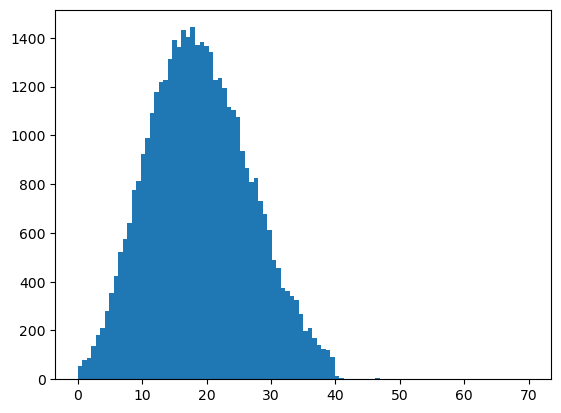

In [109]:
plt.hist(df_co['dti_joint'], bins = 100, range=[0, 70])

In [110]:
df_co['revol_bal_joint'].describe()

count     35093.000000
mean      32931.485225
std       28585.083381
min           0.000000
25%       14375.000000
50%       25526.000000
75%       42616.000000
max      473339.000000
Name: revol_bal_joint, dtype: float64

In [114]:
columns_to_extract = [
    'Default_status', "annual_inc_joint", "dti_joint", "revol_bal_joint",
    "sec_app_chargeoff_within_12_mths", "sec_app_collections_12_mths_ex_med",
    "sec_app_earliest_cr_line", "sec_app_fico_range_high", "sec_app_fico_range_low",
    "sec_app_inq_last_6mths", "sec_app_mort_acc",
    "sec_app_num_rev_accts", "sec_app_open_acc", "sec_app_open_act_il",
    "sec_app_revol_util", "verification_status_joint"
]

df_co_new = df_co[columns_to_extract]
df_co_new

,Default_status,annual_inc_joint,dti_joint,revol_bal_joint,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_earliest_cr_line,sec_app_fico_range_high,sec_app_fico_range_low,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_num_rev_accts,sec_app_open_acc,sec_app_open_act_il,sec_app_revol_util,verification_status_joint
0,0,100500.0,10.20,3926.0,1.0,0.0,Sep-2005,559.0,555.0,0.0,0.0,4.0,10.0,10.0,NaN,Verified
55,0,51000.0,33.93,17020.0,0.0,0.0,Nov-2006,639.0,635.0,0.0,0.0,10.0,11.0,2.0,75.8,Verified
80,0,59000.0,32.51,22108.0,0.0,0.0,Jan-2000,664.0,660.0,0.0,1.0,10.0,7.0,1.0,61.3,Verified
100,1,140000.0,17.11,29449.0,0.0,0.0,Apr-2007,624.0,620.0,4.0,0.0,17.0,10.0,1.0,68.8,Not Verified
106,0,150000.0,28.01,48101.0,0.0,0.0,Aug-2006,699.0,695.0,0.0,1.0,19.0,17.0,6.0,69.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755061,0,127000.0,13.12,22102.0,0.0,0.0,Oct-2004,714.0,710.0,0.0,7.0,17.0,11.0,1.0,36.4,Verified
1755075,0,140000.0,19.18,68209.0,0.0,0.0,May-2009,679.0,675.0,0.0,0.0,14.0,12.0,0.0,53.2,Not Verified
1755106,1,125184.0,23.92,62304.0,0.0,0.0,Oct-2002,689.0,685.0,0.0,1.0,19.0,13.0,1.0,90.0,Verified
1755123,0,26000.0,34.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Verified


In [116]:
df_co_new_for_corr = df_co_new.drop(columns = ['sec_app_earliest_cr_line', 'verification_status_joint'])

In [117]:
df_co_new_cor = df_co_new_for_corr.corr() # 상관계수
df_co_new_cor = round(df_co_new_cor, 2) # 소수점 둘째자리까지
df_co_new_cor

,Default_status,annual_inc_joint,dti_joint,revol_bal_joint,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_fico_range_high,sec_app_fico_range_low,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_num_rev_accts,sec_app_open_acc,sec_app_open_act_il,sec_app_revol_util
Default_status,1.00,-0.06,0.12,0.01,0.04,0.07,-0.20,-0.20,0.12,-0.12,-0.01,0.01,0.01,0.10
annual_inc_joint,-0.06,1.00,-0.15,0.44,-0.01,-0.03,0.10,0.10,0.02,0.20,0.17,0.20,0.11,0.02
dti_joint,0.12,-0.15,1.00,0.39,-0.00,-0.02,0.01,0.01,0.05,0.02,0.19,0.32,0.26,0.17
revol_bal_joint,0.01,0.44,0.39,1.00,-0.02,-0.07,0.15,0.15,0.02,0.26,0.35,0.40,0.17,0.17
sec_app_chargeoff_within_12_mths,0.04,-0.01,-0.00,-0.02,1.00,0.44,-0.18,-0.18,0.00,-0.04,0.01,-0.05,-0.00,0.01
sec_app_collections_12_mths_ex_med,0.07,-0.03,-0.02,-0.07,0.44,1.00,-0.25,-0.25,0.04,-0.08,-0.05,-0.07,-0.01,0.03
sec_app_fico_range_high,-0.20,0.10,0.01,0.15,-0.18,-0.25,1.00,1.00,-0.12,0.27,0.15,0.18,0.05,-0.43
sec_app_fico_range_low,-0.20,0.10,0.01,0.15,-0.18,-0.25,1.00,1.00,-0.12,0.27,0.15,0.18,0.05,-0.43
sec_app_inq_last_6mths,0.12,0.02,0.05,0.02,0.00,0.04,-0.12,-0.12,1.00,-0.03,0.17,0.18,0.09,-0.03
sec_app_mort_acc,-0.12,0.20,0.02,0.26,-0.04,-0.08,0.27,0.27,-0.03,1.00,0.24,0.20,0.04,-0.04


<Axes: >

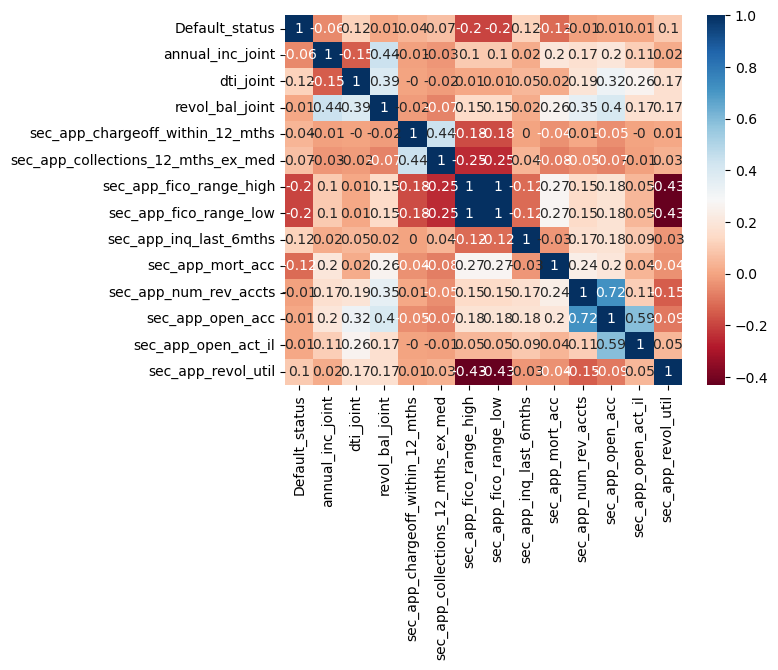

In [118]:
sns.heatmap(df_co_new_cor,
            annot = True, # 상관계수 표시
            cmap = 'RdBu') # 컬러맵